In [1]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf #optimal values for p,d,q
from statsmodels.tsa.stattools import adfuller #check stationarity
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

## APPLE

<Axes: xlabel='Date'>

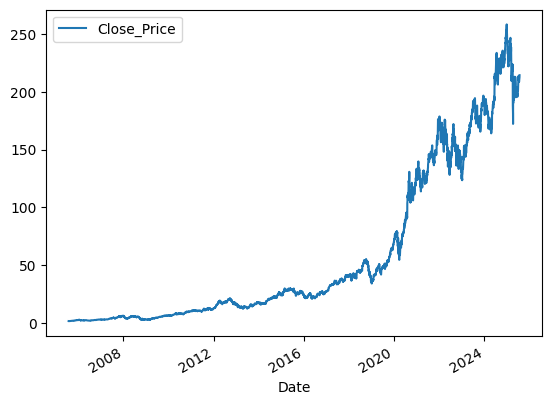

In [2]:
data = pd.read_csv("Data/Apple")
new = pd.DataFrame(data["Close"].values,columns=["Close_Price"],index=pd.to_datetime(data["Date"]))
new.plot()

2.536326666977504e-25


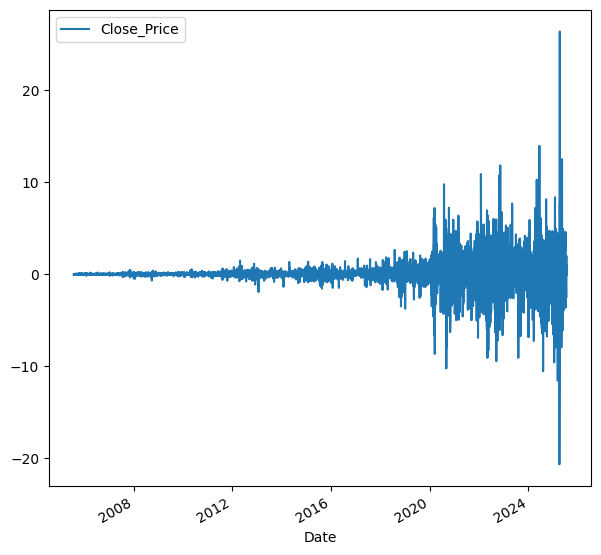

In [3]:
diff_data = new["Close_Price"] - new["Close_Price"].shift(1)
diff_data = diff_data.reset_index(drop=False).set_index("Date").dropna()
diff_data.plot(figsize=(7,7))
result = adfuller(diff_data["Close_Price"])
print(result[1]) #stationary

1.287219731034084e-29


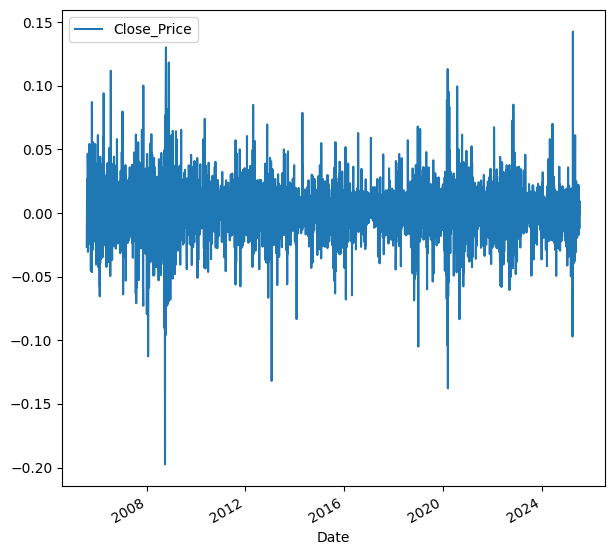

In [4]:
log_data = np.log(new["Close_Price"]).diff().dropna().reset_index(drop=False).set_index("Date")
log_data.plot(figsize=(7,7))
print(adfuller(log_data["Close_Price"])[1])

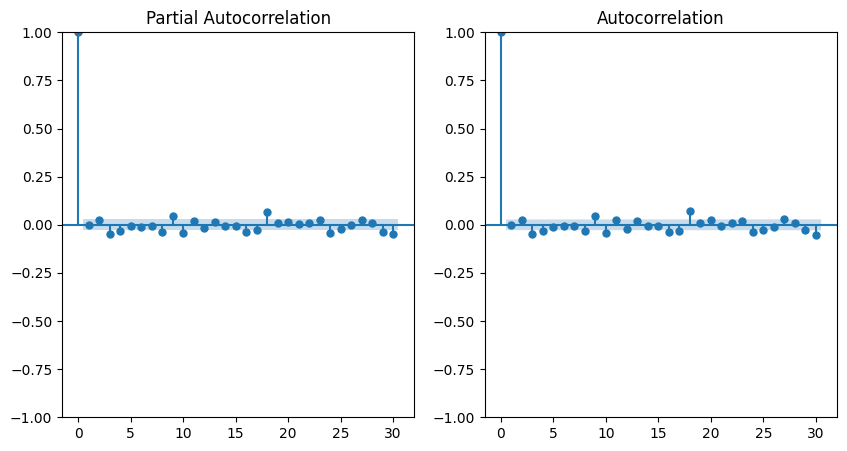

In [5]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
plot_pacf(diff_data["Close_Price"],lags=30,ax=ax[0])
plot_acf(diff_data["Close_Price"],lags=30,ax=ax[1])
plt.show()

In [6]:
x_train,x_test,y_train,y_test = train_test_split(new["Close_Price"],new["Close_Price"],test_size=0.2,shuffle=False)

In [7]:
Model_Apple = ARIMA(x_train,order=(1,2,1))
fit = Model_Apple.fit()

C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [8]:
predict = fit.forecast(60) #2 months
actual = y_test[0:60]
print(predict)
print("mae:",mean_absolute_error(actual,predict))
print("r2:",r2_score(actual,predict))

4021    139.969450
4022    140.055755
4023    140.193931
4024    140.326489
4025    140.459656
4026    140.592757
4027    140.725864
4028    140.858971
4029    140.992078
4030    141.125185
4031    141.258293
4032    141.391400
4033    141.524507
4034    141.657614
4035    141.790721
4036    141.923828
4037    142.056935
4038    142.190042
4039    142.323149
4040    142.456256
4041    142.589363
4042    142.722470
4043    142.855577
4044    142.988684
4045    143.121791
4046    143.254899
4047    143.388006
4048    143.521113
4049    143.654220
4050    143.787327
4051    143.920434
4052    144.053541
4053    144.186648
4054    144.319755
4055    144.452862
4056    144.585969
4057    144.719076
4058    144.852183
4059    144.985290
4060    145.118397
4061    145.251504
4062    145.384612
4063    145.517719
4064    145.650826
4065    145.783933
4066    145.917040
4067    146.050147
4068    146.183254
4069    146.316361
4070    146.449468
4071    146.582575
4072    146.715682
4073    146.

C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [9]:
dates = [i[0] for i in actual.reset_index(drop=False).values]
df = pd.DataFrame({"prediction":predict.reset_index(drop=True).values,"actual":actual.reset_index(drop=True).values},index=dates)
df

,prediction,actual
2021-07-20,139.969450,143.025146
2021-07-21,140.055755,142.291199
2021-07-22,140.193931,143.661255
2021-07-23,140.326489,145.383636
2021-07-26,140.459656,145.804459
2021-07-27,140.592757,143.631927
2021-07-28,140.725864,141.880157
2021-07-29,140.858971,142.526062
2021-07-30,140.992078,142.741318
2021-08-02,141.125185,142.408615


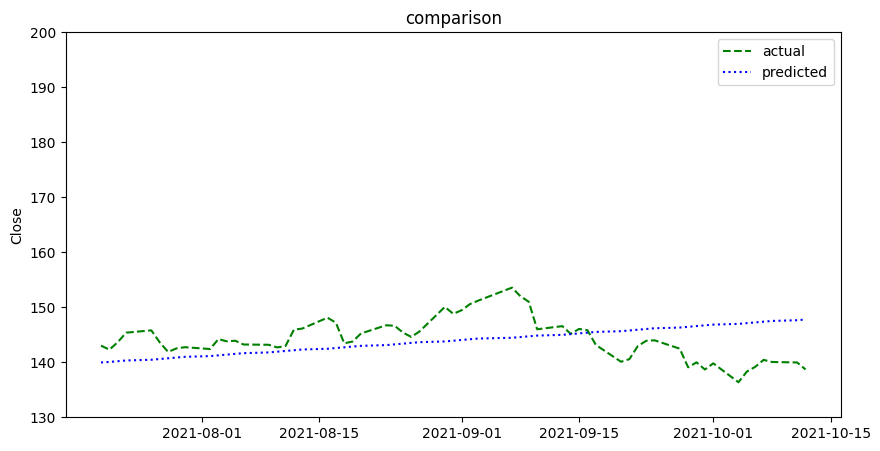

In [11]:
#compare
plt.figure(figsize=(10,5))
sns.lineplot(df["actual"],label="actual",color="green",linestyle="dashed")
sns.lineplot(df["prediction"],label="predicted",color="blue",linestyle="dotted")
plt.title("comparison")
plt.ylabel("Close")
plt.ylim(130,200)
plt.legend()
plt.show()

C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Index', ylabel='Close Intervals'>

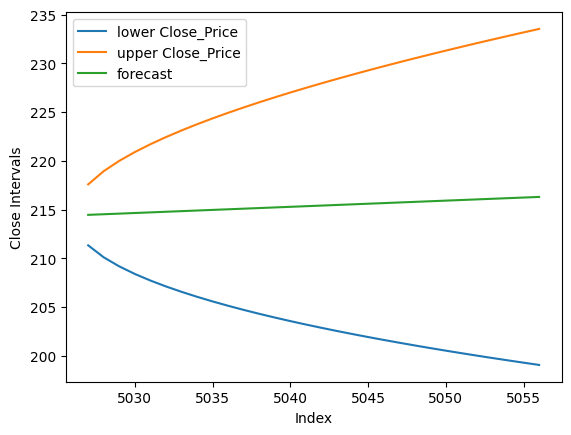

In [29]:
#forecast
model = joblib.load("Models/ARIMA/ar_apple_stocks.pkl")
prediction = model.get_forecast(steps=30)
forecast = model.forecast(30)
df = prediction.conf_int()
df["forecast"] = np.array(forecast)
df.plot(xlabel="Index",ylabel="Close Intervals")

In [13]:
final = ARIMA(new["Close_Price"],order=(1,2,1))
final_fit = final.fit()
# joblib.dump(final_fit,"Models/ARIMA/ar_apple_stocks.pkl")

C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


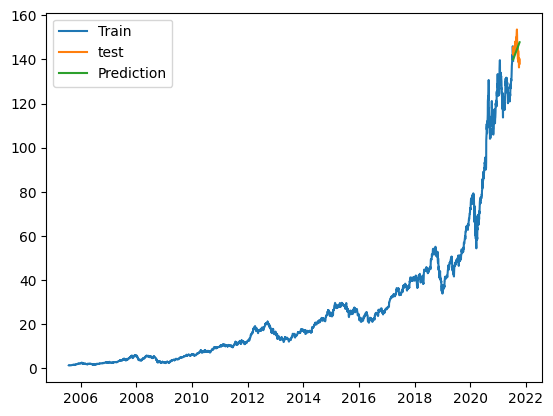

In [35]:
forecast = np.array(final_fit.forecast(30))
plt.plot(new["Close_Price"][:4021],label="Train")
plt.plot(new["Close_Price"][4022:4022+60],label="test")
plt.plot(df["prediction"][0:],label="Prediction")
plt.legend()
plt.show()

## Msft

org: 0.9990868821847586
diff: 8.133265601620485e-28


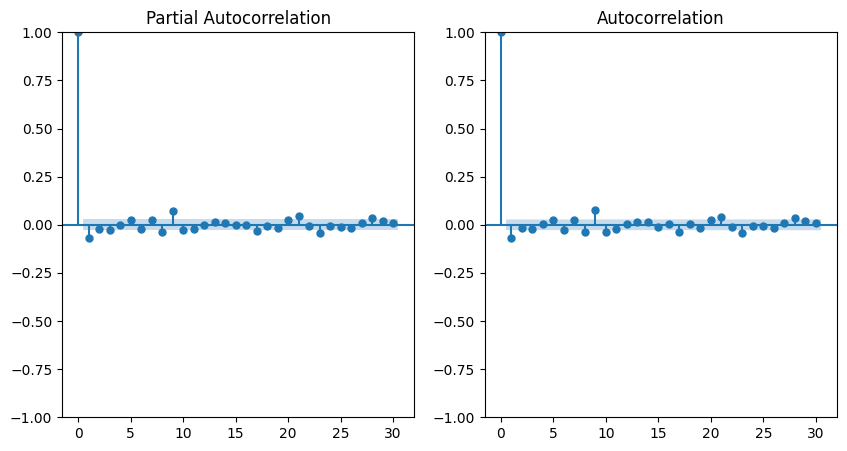

C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\

4021    269.307057
4022    268.969018
4023    269.305870
4024    269.468488
4025    269.551323
4026    270.181918
4027    269.842046
4028    270.700038
4029    270.385651
4030    271.015391
4031    271.060604
4032    271.274728
4033    271.720687
4034    271.611547
4035    272.257921
4036    272.092495
4037    272.655819
4038    272.685271
4039    272.985140
4040    273.296415
4041    273.344312
4042    273.839192
4043    273.795295
4044    274.284154
4045    274.333396
4046    274.665976
4047    274.902643
4048    275.050603
4049    275.438965
4050    275.489863
4051    275.910094
4052    275.993094
4053    276.328885
4054    276.529569
4055    276.737107
4056    277.054446
4057    277.174983
4058    277.538288
4059    277.657390
4060    277.981780
4061    278.169737
4062    278.409641
4063    278.682253
4064    278.851287
4065    279.170684
4066    279.322332
4067    279.629770
4068    279.817841
4069    280.072817
4070    280.319160
4071    280.520224
4072    280.807675
4073    280.

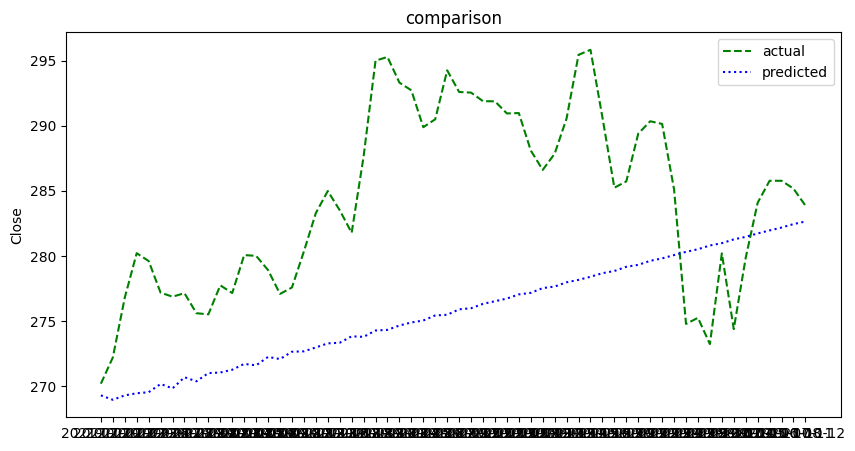

C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['Models/ARIMA/ar_mdft_stocks.pkl']

In [14]:
data = pd.read_csv("Data/Microsoft")
new = pd.DataFrame(data["Close"],columns=["Close"]).set_index(data["Date"])
test_st = adfuller(new["Close"])
print("org:",test_st[1])
#diff
diff_data = new["Close"].diff().reset_index().set_index("Date").dropna()
test_st = adfuller(diff_data["Close"])
print("diff:",test_st[1])
#plots for P(Past values to predict) and Q(Past Errors to improve)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
plot_pacf(diff_data["Close"],lags=30,ax=ax[0])
plot_acf(diff_data["Close"],lags=30,ax=ax[1])
plt.show()
#split
x_train,x_test,y_train,y_test = train_test_split(new["Close"],new["Close"],test_size=0.2,shuffle=False)
Model_Apple = ARIMA(x_train,order=(5,2,3))
fit = Model_Apple.fit()
#evaluation and predictions
predict = fit.forecast(60) #2 months
actual = y_test[0:60]
print(predict)
print("mae:",mean_absolute_error(actual,predict))
print("r2:",r2_score(actual,predict))
#converting into df
dates = [i[0] for i in actual.reset_index(drop=False).values]
df = pd.DataFrame({"prediction":predict.reset_index(drop=True).values,"actual":actual.reset_index(drop=True).values},index=dates)
df
#comparison actual vs predicted 60days
plt.figure(figsize=(10,5))
sns.lineplot(df["actual"],label="actual",color="green",linestyle="dashed")
sns.lineplot(df["prediction"],label="predicted",color="blue",linestyle="dotted")
plt.title("comparison")
plt.ylabel("Close")
plt.legend()
plt.show()
#saving
final = ARIMA(new["Close"],order=(5,2,3))
final_fit = final.fit()
joblib.dump(final_fit,"Models/ARIMA/ar_mdft_stocks.pkl")

C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Index', ylabel='Close Intervals'>

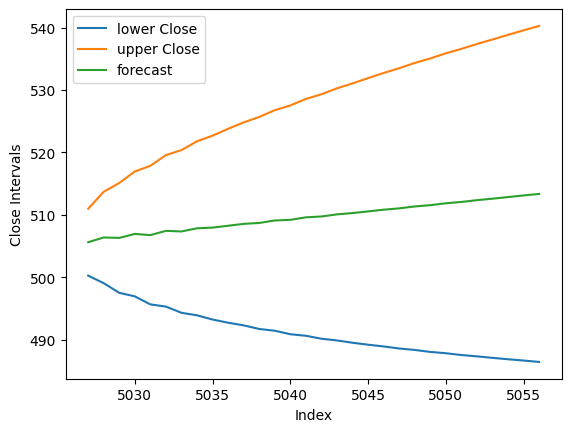

In [30]:
model = joblib.load("Models/ARIMA/ar_mdft_stocks.pkl")
prediction = model.get_forecast(steps=30)
forecast = model.forecast(30)
df = prediction.conf_int()
df["forecast"] = np.array(forecast)
df.plot(xlabel="Index",ylabel="Close Intervals")

## IBM

org: 0.9989651891717776
diff: 9.240784228565219e-29


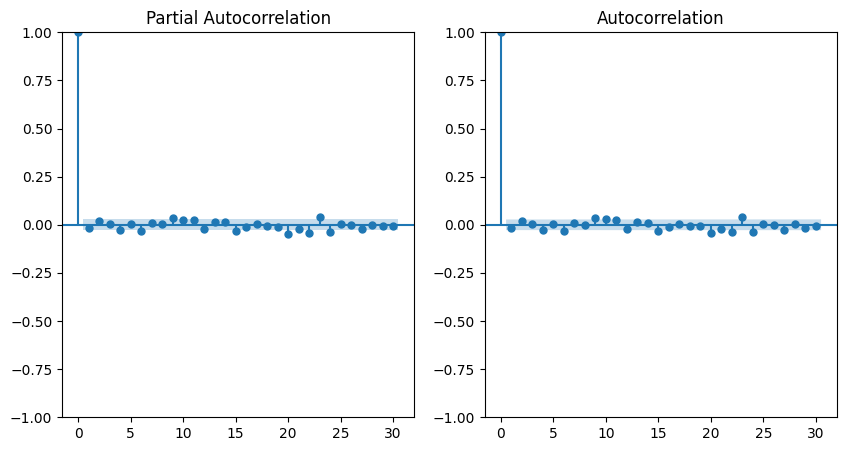

C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

4021    111.194247
4022    111.234213
4023    111.228133
4024    111.267596
4025    111.262014
4026    111.300985
4027    111.295889
4028    111.334378
4029    111.329759
4030    111.367777
4031    111.363624
4032    111.401181
4033    111.397484
4034    111.434590
4035    111.431339
4036    111.468003
4037    111.465189
4038    111.501422
4039    111.499034
4040    111.534845
4041    111.532875
4042    111.568273
4043    111.566711
4044    111.601705
4045    111.600542
4046    111.635142
4047    111.634370
4048    111.668582
4049    111.668193
4050    111.702027
4051    111.702012
4052    111.735477
4053    111.735827
4054    111.768930
4055    111.769638
4056    111.802387
4057    111.803445
4058    111.835848
4059    111.837249
4060    111.869312
4061    111.871049
4062    111.902780
4063    111.904845
4064    111.936252
4065    111.938637
4066    111.969728
4067    111.972426
4068    112.003206
4069    112.006212
4070    112.036688
4071    112.039994
4072    112.070174
4073    112.

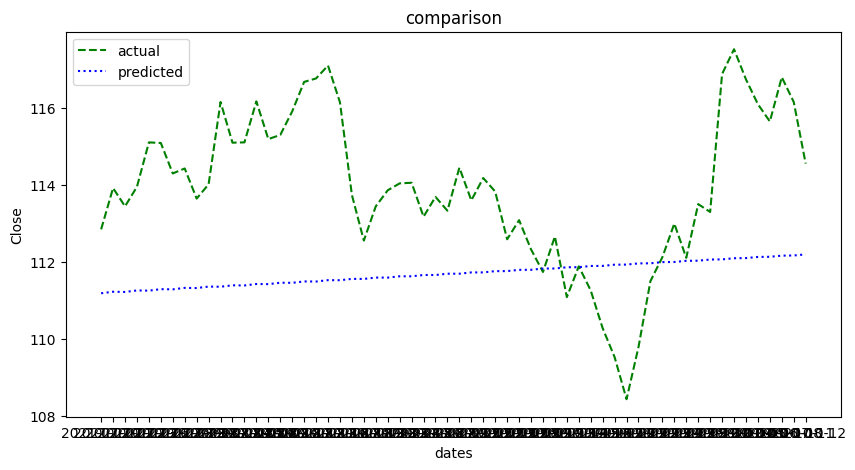

C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


['Models/ARIMA/ar_ibm_stocks.pkl']

In [89]:
data = pd.read_csv("Data/IBM")
new = pd.DataFrame(data["Close"],columns=["Close"]).set_index(data["Date"])
test_st = adfuller(new["Close"])
print("org:",test_st[1])
#diff
diff_data = new["Close"].diff().reset_index().set_index("Date").dropna()
test_st = adfuller(diff_data["Close"])
print("diff:",test_st[1])
#plots for P(Past values to predict) and Q(Past Errors to improve)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
plot_pacf(diff_data["Close"],lags=30,ax=ax[0])
plot_acf(diff_data["Close"],lags=30,ax=ax[1])
plt.show()
#split
x_train,x_test,y_train,y_test = train_test_split(new["Close"],new["Close"],test_size=0.2,shuffle=False)
Model_Apple = ARIMA(x_train,order=(1,2,2))
fit = Model_Apple.fit()
#evaluation and predictions
predict = fit.forecast(60) #2 months
actual = y_test[0:60]
print(predict)
print("mae:",mean_absolute_error(actual,predict))
print("r2:",r2_score(actual,predict))
#converting into df
dates = [i[0] for i in actual.reset_index(drop=False).values]
df = pd.DataFrame({"dates":dates,"prediction":predict.reset_index(drop=True).values,"actual":actual.reset_index(drop=True).values})
df
#comparison actual vs predicted 60days
plt.figure(figsize=(10,5))
sns.lineplot(x=df["dates"],y=df["actual"],label="actual",color="green",linestyle="dashed")
sns.lineplot(x=df["dates"],y=df["prediction"],label="predicted",color="blue",linestyle="dotted")
plt.title("comparison")
plt.ylabel("Close")
# plt.ylim(250,300)
plt.legend()
plt.show()
#saving
final = ARIMA(new["Close"],order=(1,2,2))
final_fit = final.fit()
joblib.dump(final_fit,"Models/ARIMA/ar_ibm_stocks.pkl")

C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Index', ylabel='Close Intervals'>

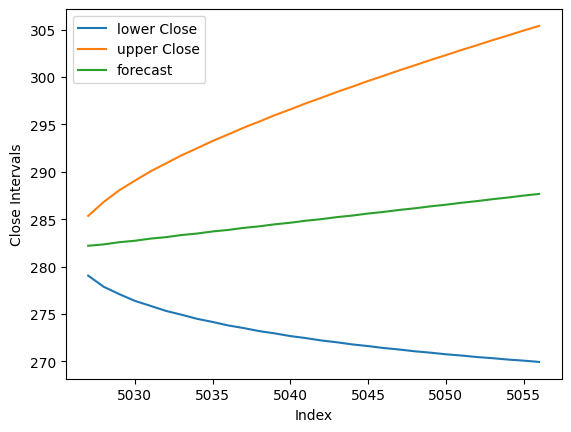

In [31]:
model = joblib.load("Models/ARIMA/ar_ibm_stocks.pkl")
prediction = model.get_forecast(steps=30)
forecast = model.forecast(30)
df = prediction.conf_int()
df["forecast"] = np.array(forecast)
df.plot(xlabel="Index",ylabel="Close Intervals")

## GE

org: 0.9964815859836674
diff: 1.1828025989500764e-22


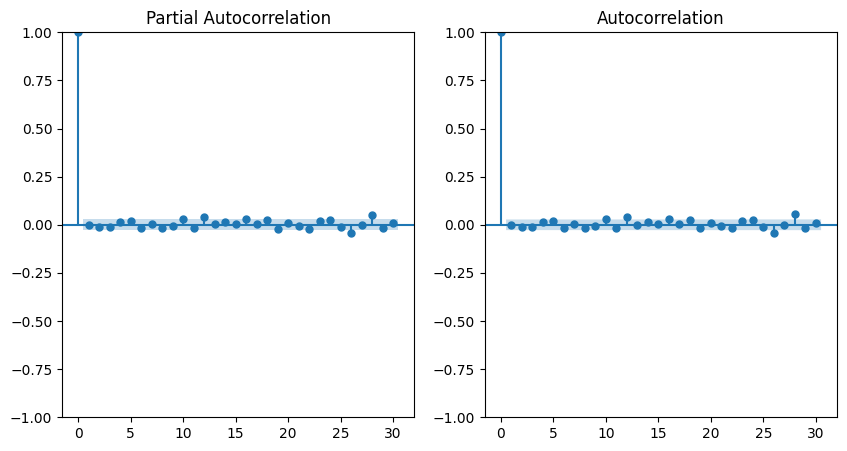

C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\

4021    58.723238
4022    58.756099
4023    58.733396
4024    58.723845
4025    58.702558
4026    58.693653
4027    58.672330
4028    58.663406
4029    58.642079
4030    58.633148
4031    58.611816
4032    58.602878
4033    58.581540
4034    58.572595
4035    58.551252
4036    58.542299
4037    58.520952
4038    58.511991
4039    58.490638
4040    58.481670
4041    58.460313
4042    58.451337
4043    58.429974
4044    58.420991
4045    58.399623
4046    58.390633
4047    58.369260
4048    58.360262
4049    58.338884
4050    58.329878
4051    58.308495
4052    58.299482
4053    58.278094
4054    58.269073
4055    58.247681
4056    58.238652
4057    58.217255
4058    58.208218
4059    58.186816
4060    58.177772
4061    58.156364
4062    58.147313
4063    58.125901
4064    58.116842
4065    58.095424
4066    58.086358
4067    58.064935
4068    58.055862
4069    58.034434
4070    58.025352
4071    58.003920
4072    57.994831
4073    57.973393
4074    57.964297
4075    57.942854
4076    57

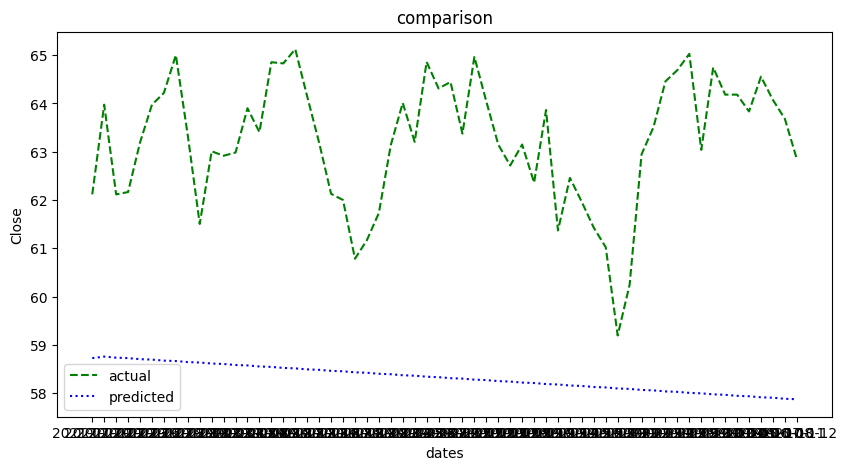

C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


['Models/ARIMA/ar_ge_stocks.pkl']

In [90]:
data = pd.read_csv("Data/GeneralElectric")
new = pd.DataFrame(data["Close"],columns=["Close"]).set_index(data["Date"])
test_st = adfuller(new["Close"])
print("org:",test_st[1])
#diff
diff_data = new["Close"].diff().reset_index().set_index("Date").dropna()
test_st = adfuller(diff_data["Close"])
print("diff:",test_st[1])
#plots for P(Past values to predict) and Q(Past Errors to improve)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
plot_pacf(diff_data["Close"],lags=30,ax=ax[0])
plot_acf(diff_data["Close"],lags=30,ax=ax[1])
plt.show()
#split
x_train,x_test,y_train,y_test = train_test_split(new["Close"],new["Close"],test_size=0.2,shuffle=False)
Model_Apple = ARIMA(x_train,order=(3,3,3))
fit = Model_Apple.fit()
#evaluation and predictions
predict = fit.forecast(60) #2 months
actual = y_test[0:60]
print(predict)
print("mae:",mean_absolute_error(actual,predict))
print("r2:",r2_score(actual,predict))
#converting into df
dates = [i[0] for i in actual.reset_index(drop=False).values]
df = pd.DataFrame({"dates":dates,"prediction":predict.reset_index(drop=True).values,"actual":actual.reset_index(drop=True).values})
df
#comparison actual vs predicted 60days
plt.figure(figsize=(10,5))
sns.lineplot(x=df["dates"],y=df["actual"],label="actual",color="green",linestyle="dashed")
sns.lineplot(x=df["dates"],y=df["prediction"],label="predicted",color="blue",linestyle="dotted")
plt.title("comparison")
plt.ylabel("Close")
# plt.ylim(250,300)
plt.legend()
plt.show()
#saving
final = ARIMA(new["Close"],order=(3,3,3))
final_fit = final.fit()
joblib.dump(final_fit,"Models/ARIMA/ar_ge_stocks.pkl")

C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Index', ylabel='Close Intervals'>

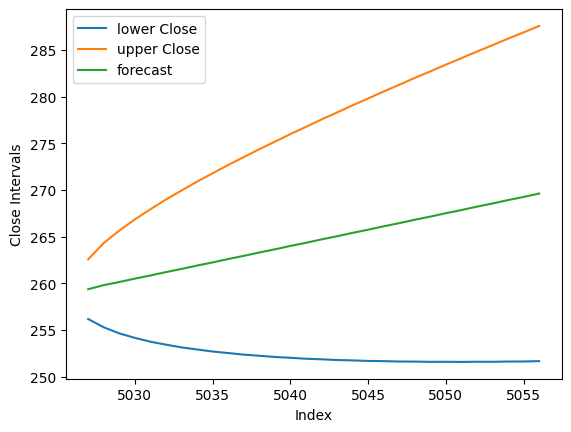

In [32]:
#forecast
model = joblib.load("Models/ARIMA/ar_ge_stocks.pkl")
prediction = model.get_forecast(steps=30)
forecast = model.forecast(30)
df = prediction.conf_int()
df["forecast"] = np.array(forecast)
df.plot(xlabel="Index",ylabel="Close Intervals")

# JNJ

org: 0.9462633669116611
diff: 3.70938506003684e-30


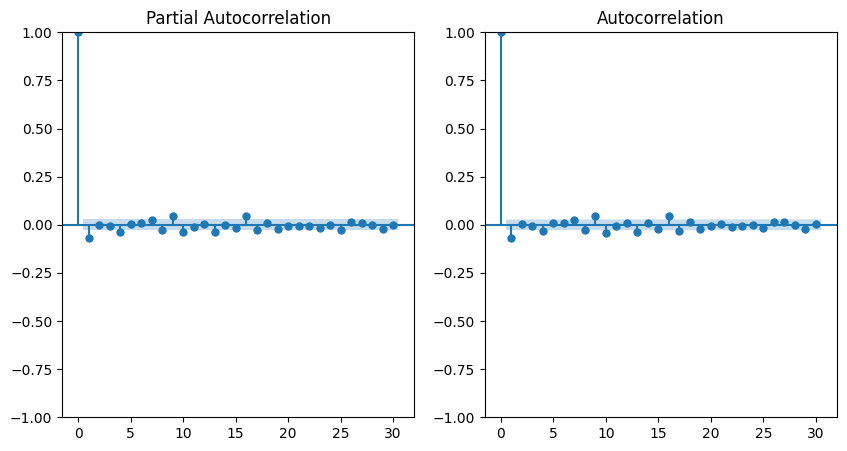

C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

4021    148.737230
4022    148.807241
4023    148.794950
4024    148.869661
4025    148.868957
4026    148.931826
4027    148.941342
4028    148.995601
4029    149.012342
4030    149.060543
4031    149.082364
4032    149.126305
4033    149.151698
4034    149.192644
4035    149.220549
4036    149.259388
4037    149.289059
4038    149.326418
4039    149.357330
4040    149.393648
4041    149.425433
4042    149.461019
4043    149.493418
4044    149.528489
4045    149.561320
4046    149.596029
4047    149.629163
4048    149.663618
4049    149.696965
4050    149.731241
4051    149.764739
4052    149.798889
4053    149.832492
4054    149.866554
4055    149.900231
4056    149.934230
4057    149.967959
4058    150.001915
4059    150.035681
4060    150.069606
4061    150.103398
4062    150.137301
4063    150.171111
4064    150.204999
4065    150.238822
4066    150.272699
4067    150.306531
4068    150.340401
4069    150.374238
4070    150.408103
4071    150.441945
4072    150.475807
4073    150.

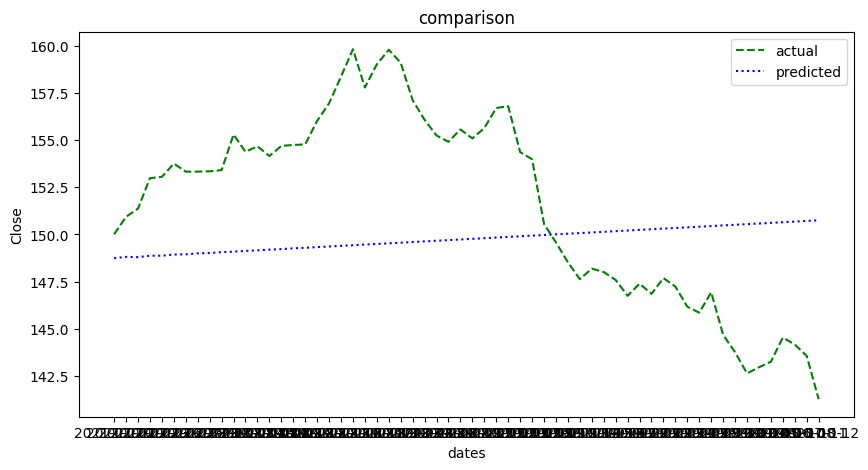

C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


['Models/ARIMA/ar_jnj_stocks.pkl']

In [91]:
data = pd.read_csv("Data/johnson&johnson")
new = pd.DataFrame(data["Close"],columns=["Close"]).set_index(data["Date"])
test_st = adfuller(new["Close"])
print("org:",test_st[1])
#diff
diff_data = new["Close"].diff().reset_index().set_index("Date").dropna()
test_st = adfuller(diff_data["Close"])
print("diff:",test_st[1])
#plots for P(Past values to predict) and Q(Past Errors to improve)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
plot_pacf(diff_data["Close"],lags=30,ax=ax[0])
plot_acf(diff_data["Close"],lags=30,ax=ax[1])
plt.show()
#split
x_train,x_test,y_train,y_test = train_test_split(new["Close"],new["Close"],test_size=0.2,shuffle=False)
Model_Apple = ARIMA(x_train,order=(2,2,2))
fit = Model_Apple.fit()
#evaluation and predictions
predict = fit.forecast(60) #2 months
actual = y_test[0:60]
print(predict)
print("mae:",mean_absolute_error(actual,predict))
print("r2:",r2_score(actual,predict))
#converting into df
dates = [i[0] for i in actual.reset_index(drop=False).values]
df = pd.DataFrame({"dates":dates,"prediction":predict.reset_index(drop=True).values,"actual":actual.reset_index(drop=True).values})
df
#comparison actual vs predicted 60days
plt.figure(figsize=(10,5))
sns.lineplot(x=df["dates"],y=df["actual"],label="actual",color="green",linestyle="dashed")
sns.lineplot(x=df["dates"],y=df["prediction"],label="predicted",color="blue",linestyle="dotted")
plt.title("comparison")
plt.ylabel("Close")
# plt.ylim(250,300)
plt.legend()
plt.show()
#saving
final = ARIMA(new["Close"],order=(2,2,2))
final_fit = final.fit()
joblib.dump(final_fit,"Models/ARIMA/ar_jnj_stocks.pkl")

C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\lipun\jupyterfix\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Index', ylabel='Close Intervals'>

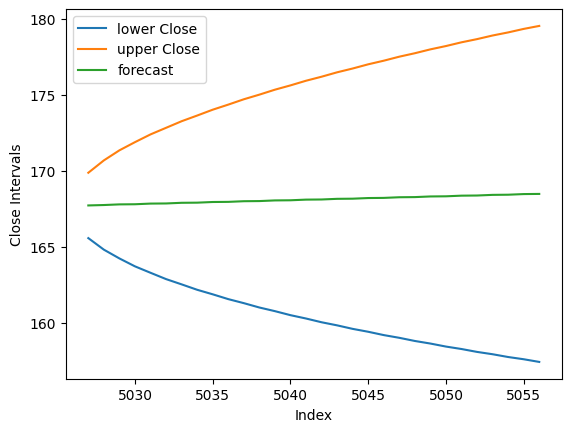

In [33]:
#forecast
model = joblib.load("Models/ARIMA/ar_jnj_stocks.pkl")
prediction = model.get_forecast(steps=30)
forecast = model.forecast(30)
df = prediction.conf_int()
df["forecast"] = np.array(forecast)
df.plot(xlabel="Index",ylabel="Close Intervals")